In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from matplotlib import colors, ticker

from fibrosisanalysis.parsers.stats_loader import StatsLoader
from fibrosisanalysis.slice.heart_slice import HeartSliceBuilder
from fibrosisanalysis.analysis import (
    ObjectsPropertiesBuilder,
    SegmentsPropertiesBuilder
)

from tqdm.notebook import tqdm


def collect_data(path, hearts, n_radial, n_angular, node_step):
    hearts_props = []
    hearts_props_gen = []
    
    loc_bins=np.linspace(0, n_angular * n_radial, n_radial + 1)
    loc_labels=['SUB-ENDO', 'MID', 'SUB-EPI']

    for heart, _ in hearts.items():
        path_ = path.joinpath(heart, 'Stats')
        files = list(path_.glob('*{}'.format('.pkl')))
        files = sorted([file.stem for file in files if not file.name.startswith('.')])

        for slice_name in tqdm(files[:]):
            # Load slice and build HeartSlice object
            heart_slice_builder = HeartSliceBuilder()
            heart_slice_builder.build_from_file(path, 
                                                heart, 
                                                slice_name,
                                                n_angular,
                                                n_radial, 
                                                node_step)
            heart_slice = heart_slice_builder.heart_slice

            # Load stats
            path_slice_stats = path.joinpath(heart, 'Stats', slice_name)
            stats_loader = StatsLoader(path)
            object_stats = stats_loader.load_slice_data(path_slice_stats)

            # Build objects properties
            objects_props_builder = ObjectsPropertiesBuilder()
            objects_props_builder.build_from_stats(object_stats)
            objects_props_builder.add_slice_props(heart_slice)
            objects_props = objects_props_builder.objects_props

            # Build segment properties
            segments_props_builder = SegmentsPropertiesBuilder()
            segments_props_builder.build(heart_slice, objects_props)
            props = segments_props_builder.props

            props['location'] = pd.cut(props['segment_labels'],
                                       bins=loc_bins,
                                       labels=loc_labels)
            props['heart'] = heart
            hearts_props.append(props)
            
    hearts_props = pd.concat(hearts_props)
    return hearts_props


In [2]:
# path = Path('/home/arstan/Projects/Fibrosis/FibrosisAnalysis/data')
path = Path('/Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data')
path_stats = path

hearts = {'E10691_RBM20': 'A', 'E11444_LMNA': 'B', 'E10927_MYBPC3': 'C'}

n_radial = 3
n_angular = 12
node_step = 3


data = collect_data(path, hearts, n_radial, n_angular, node_step)
data.head()

  0%|          | 0/18 [00:00<?, ?it/s]

/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')
/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')
/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')


  0%|          | 0/19 [00:00<?, ?it/s]

/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')
/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')
/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')
/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')
/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: No

  0%|          | 0/15 [00:00<?, ?it/s]

/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')
/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')
/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')
/Users/arstanbek/Projects/BiTis/bitis/texture/properties/distribution_ellipse.py:55: UserWarning: Not enough samples to build the distribution ellipse.
  warnings.warn('Not enough samples to build the distribution ellipse.')


,segment_labels,centroid-0,centroid-1,edge_direction,structural_anisotropy,sa_orientation,sa_major_axis,sa_minor_axis,fibrosis,relative_orientation,location,heart
0,1,2133.692310,1006.566355,-1.508172,2.365569,2.143828,11.395779,4.817353,0.125473,-0.510407,SUB-ENDO,E10691_RBM20
1,2,2105.010255,776.013877,-2.044876,2.049053,2.120559,10.270776,5.012449,0.079439,-1.023842,SUB-ENDO,E10691_RBM20
2,3,1932.136120,675.952002,-3.064540,2.290594,-2.511102,14.724527,6.428257,0.117301,-0.553438,SUB-ENDO,E10691_RBM20
3,4,1740.912047,763.390914,2.619906,1.244295,2.430331,8.388468,6.741541,0.075309,0.189576,SUB-ENDO,E10691_RBM20
4,5,1560.199564,864.353748,2.347240,1.237066,2.908441,7.672991,6.202572,0.124548,-0.561201,SUB-ENDO,E10691_RBM20


### Elongation

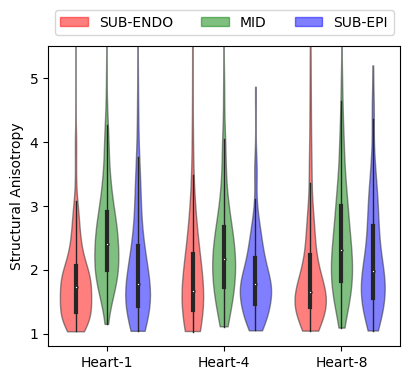

In [3]:
import seaborn as sns
import matplotlib.patches as mpatches

COLORS = {'SUB-ENDO': 'r', 'MID': 'g', 'SUB-EPI': 'b'}

fig, ax = plt.subplots(ncols=1, figsize=(4, 4))

sns.violinplot(data=data, y='structural_anisotropy', x='heart', hue='location', 
               ax=ax, palette=COLORS, alpha=0.5, saturation=1,
               linewidth=1, legend=False, cut=0)


for violin in ax.collections[::2]:
    violin.set_alpha(0.5)
ax.set_xticks(ticks=[0, 1, 2], labels=['Heart-1', 'Heart-4', 'Heart-8'])
ax.set_xlabel('')

ax.set_ylim(0.8, 5.5)
ax.get_legend().remove()
ax.set_ylabel('Structural Anisotropy')

plt.subplots_adjust(top=0.85, bottom=0.1, right=0.98, left=0.1,
                    wspace=0.1, hspace=0.2)

legends = [mpatches.Patch(color=color, label=label,
                          alpha=0.5) for label, color in COLORS.items()]
fig.legend(handles=legends, labels=list(COLORS.keys()), loc='center',
           bbox_to_anchor=(0.54, 0.91), ncol=3)
# fig.legend(handles=bar_gen.patches[:1] + bar.patches[:1],
#            labels=['Uniform generator', 'Histology'], loc='center',
#            bbox_to_anchor=(0.5, 0.96), ncol=2)
plt.show()

In [4]:
path_save = Path('/Users/arstanbek/Projects/FibrosisAnalysis/paperfigures/figures')
fig.savefig(path_save.joinpath('structural_anisotropy.png'),
            dpi=300, bbox_inches='tight')

In [45]:
grouped = data.groupby(['heart', 'location'], observed=True)
grouped['structural_anisotropy'].describe()

count      mean       std       min       25%  \
heart         location                                                  
E10691_RBM20  SUB-ENDO  214.0  1.656559  0.496530  1.004680  1.312579   
              MID       214.0  2.240586  0.675097  1.098560  1.802331   
              SUB-EPI   215.0  1.938865  0.930286  1.051226  1.406658   
E10927_MYBPC3 SUB-ENDO  178.0  1.785170  0.666175  1.039308  1.354501   
              MID       177.0  2.248288  0.875666  1.176556  1.695176   
              SUB-EPI   178.0  2.028968  0.729605  1.042333  1.489869   
E11444_LMNA   SUB-ENDO  220.0  1.845135  0.886688  1.032910  1.305057   
              MID       220.0  2.024748  0.587124  1.063563  1.646362   
              SUB-EPI   217.0  1.725010  0.475310  1.011072  1.400760   

                             50%       75%        max  
heart         location                                 
E10691_RBM20  SUB-ENDO  1.554189  1.844603   4.752338  
              MID       2.143111  2.554756   6.182694  
              SUB-EPI   1.731915  2.223391  11.250076  
E10927_MYBPC3 SUB-ENDO  1.588270  1.988048   4.494433  
              MID       2.031980  2.515868   7.467409  
              SUB-EPI   1.813955  2.485144   5.073819  
E11444_LMNA   SUB-ENDO  1.556456  2.078755   6.667117  
              MID       1.934441  2.299372   4.331399  
              SUB-EPI   1.634440  1.953989   3.663345

In [48]:
loc_bins=np.linspace(0, n_angular * n_radial, n_radial + 1)
loc_labels=['SUB-ENDO', 'MID', 'SUB-EPI']

for heart in ['E10691_RBM20']:
    path_ = path_stats.joinpath(heart, 'Stats')
    files = list(path_.glob('*{}'.format('.pkl')))
    files = sorted([file.stem for file in files if not file.name.startswith('.')])

    for slice_name in tqdm(files[17:]):
        # Load slice and build HeartSlice object
        heart_slice_builder = HeartSliceBuilder()
        heart_slice_builder.build_from_file(path, 
                                            heart, 
                                            slice_name,
                                            n_angular,
                                            n_radial, 
                                            node_step)
        heart_slice = heart_slice_builder.heart_slice

        # Load stats
        path_slice_stats = path_stats.joinpath(heart, 'Stats', slice_name)
        stats_loader = StatsLoader(path_stats)
        object_stats = stats_loader.load_slice_data(path_slice_stats)

        # Build objects properties
        objects_props_builder = ObjectsPropertiesBuilder()
        objects_props_builder.build_from_stats(object_stats)
        objects_props_builder.add_slice_props(heart_slice)
        objects_props = objects_props_builder.objects_props


  0%|          | 0/1 [00:00<?, ?it/s]